In [69]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from sympy.printing.pretty.pretty_symbology import line_width

%matplotlib inline
sns.set_style('darkgrid')

In [49]:
import yfinance as yf

# Fetch Tesla stock data
tsla = yf.download("TSLA", start="2020-01-01", end="2025-03-28")

# Plot the closing price over time
plt.figure(figsize=(14, 6))
plt.plot(tsla_data['Close'], label='Tesla Closing Price')
plt.title("Tesla (TSLA) Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


NameError: name 'tsla_data' is not defined

<Figure size 1400x600 with 0 Axes>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [50]:
tsla

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...
2025-03-21,248.710007,249.520004,234.550003,234.990005,132728700
2025-03-24,278.390015,278.640015,256.329987,258.079987,169079900


<Axes: xlabel='Date'>

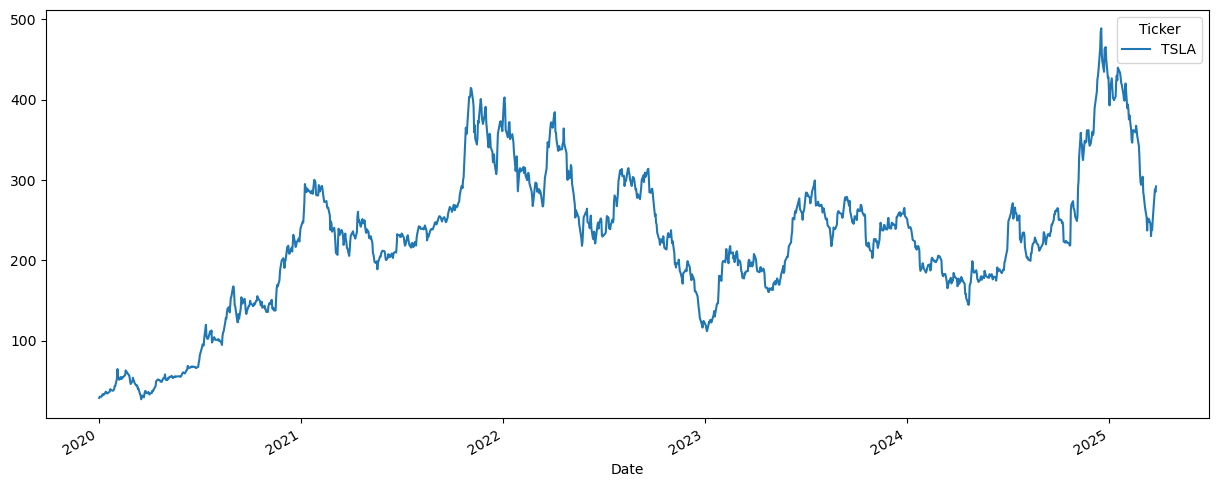

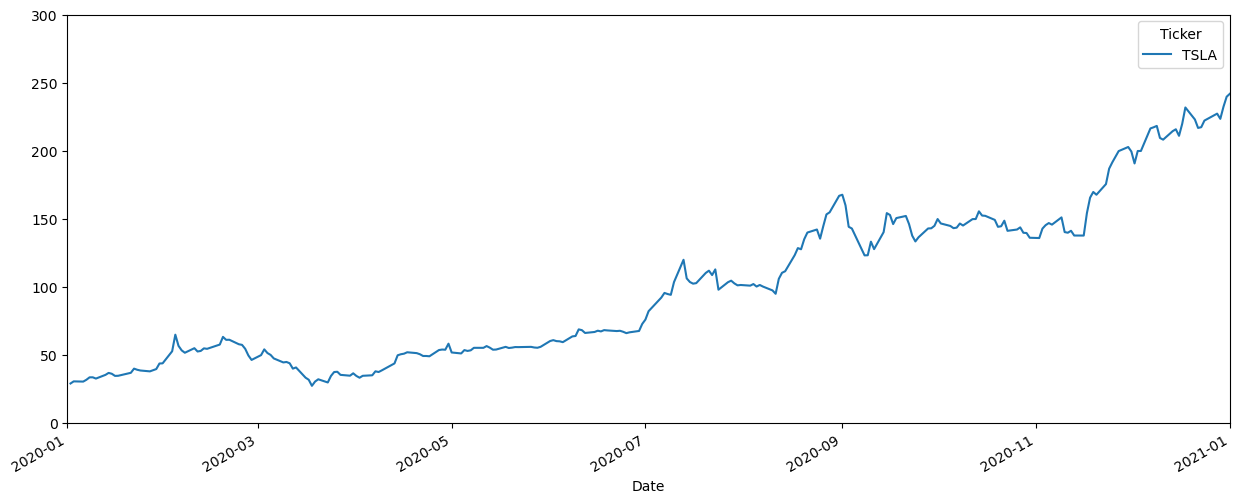

In [51]:
# plot time serise data

tsla["High"].plot(figsize=(15, 6))
tsla["High"].plot(figsize=(15, 6), xlim=["2020", "2021"], ylim=[0, 300])

In [14]:
tsla.columns

MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [21]:
tsla.columns

MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

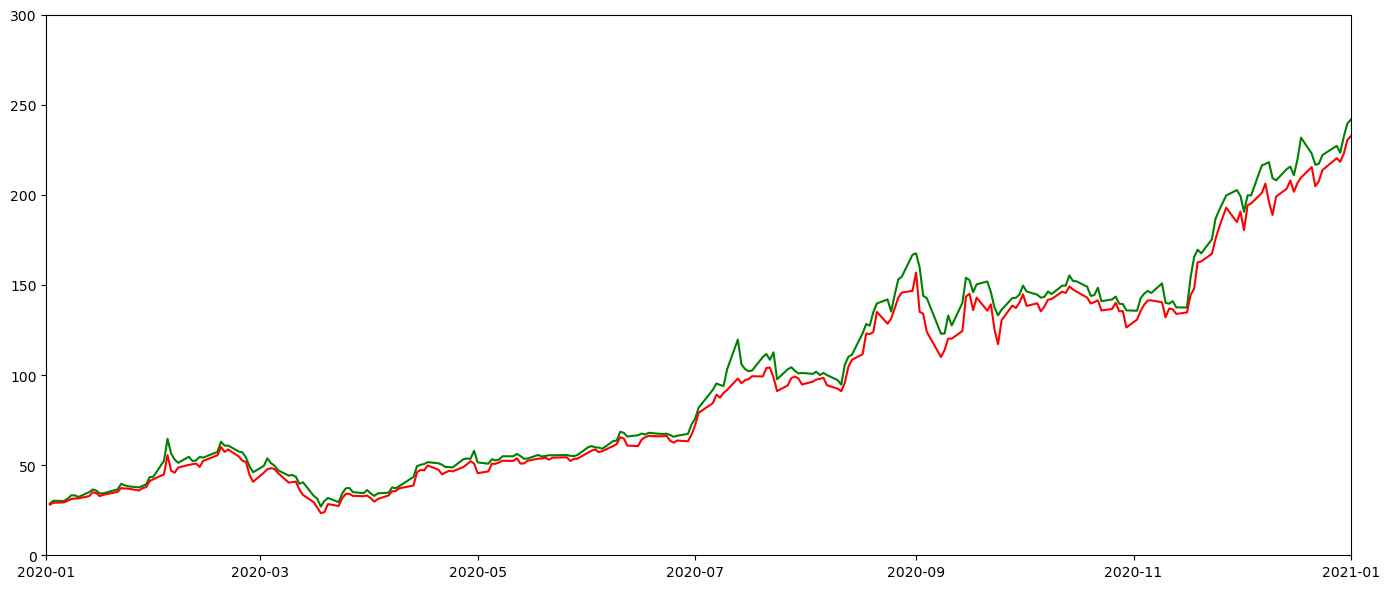

In [25]:
plt.figure(figsize=(14, 6))

plt.plot(tsla.High, c="g")
plt.plot(tsla.Low, c="r")
plt.xlim([pd.to_datetime("2020-01-01"), pd.to_datetime("2021-01-01")])
plt.ylim([0, 300])
plt.tight_layout()
plt.show()

In [52]:
tsla.loc['2020-01-01':'2021-01-01'].index
open_share = tsla.loc['2020-01-01':'2021-01-01']["Open"]

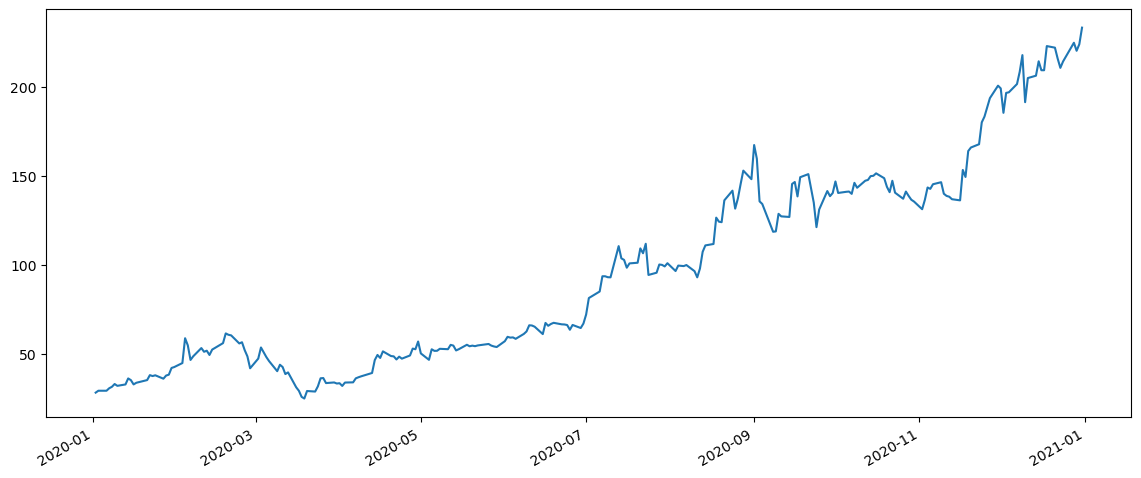

In [53]:
fig, ax = plt.subplots(figsize=(14, 6))  # Use figsize instead of size
ax.plot(open_share)  # Assuming `open_share` is a valid list or NumPy array
fig.autofmt_xdate()  # Adjust date labels if needed

plt.show()

In [38]:
tsla.resample(rule="YE").max()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-12-31,235.223328,239.573334,230.373337,233.330002,914082000
2021-12-31,409.970001,414.496674,405.666656,411.470001,268189500
2022-12-31,399.926666,402.666656,378.679993,396.516663,221923300
2023-12-31,293.339996,299.290009,289.519989,296.040009,306590600
2024-12-31,479.859985,488.540009,457.510010,475.899994,243869700
2025-12-31,428.220001,439.739990,419.750000,432.640015,189076900


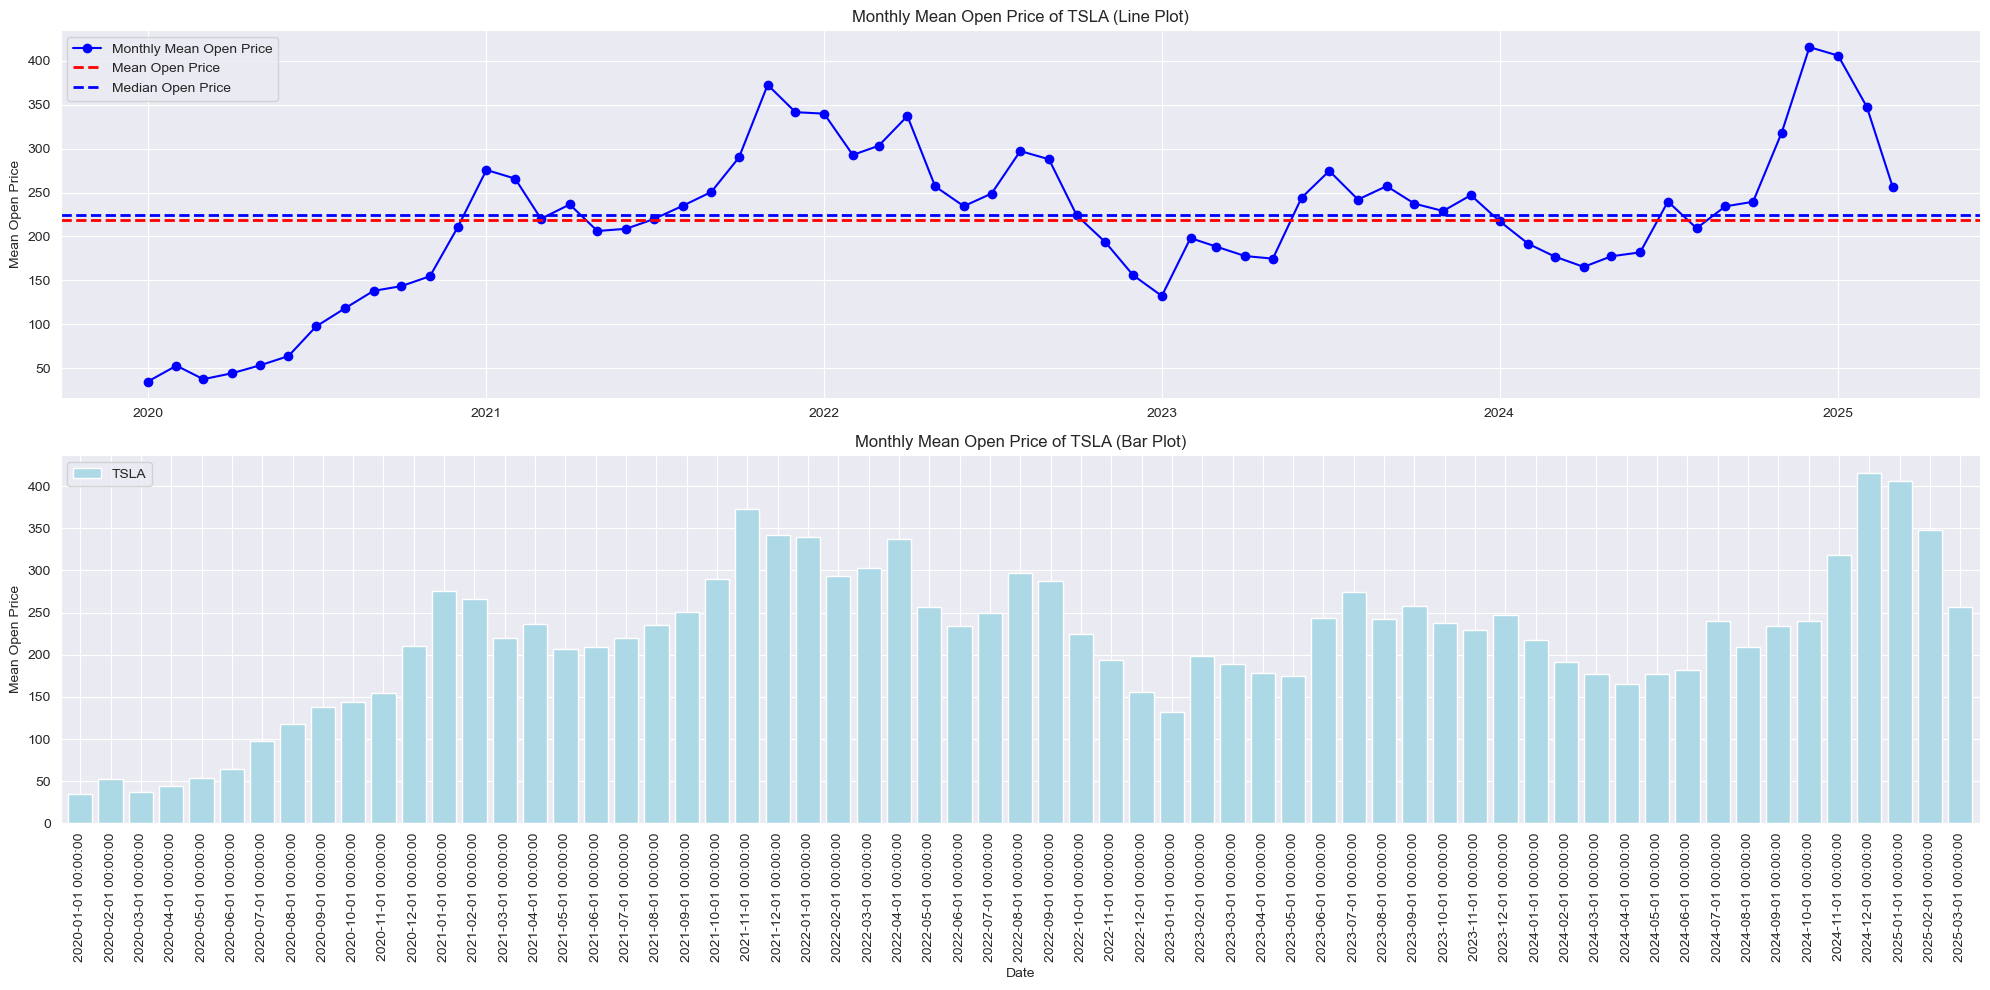

In [106]:
import pathlib

# Compute Mean and Median Open Prices (Ensure They Are Scalars)
mean_tsla = tsla["Open"].mean().item()  # Convert to float
median_tsla = tsla["Open"].median().item()  # Convert to float

# Resample: Monthly Mean Open Price
tesla_opening_mean = tsla["Open"].resample(rule="MS").mean()

# Create subplots
fig, (ax, ax1) = plt.subplots(2, 1, figsize=(20, 10))

# Line plot on the first subplot
ax.plot(tesla_opening_mean, marker="o", linestyle="-", color="blue", label="Monthly Mean Open Price")

# ✅ FIX: Extract scalar values before using axhline()
ax.axhline(mean_tsla, color="r", linestyle="--", linewidth=2, label="Mean Open Price")
ax.axhline(median_tsla, color="b", linestyle="--", linewidth=2, label="Median Open Price")

ax.set_title("Monthly Mean Open Price of TSLA (Line Plot)")
ax.set_ylabel("Mean Open Price")
ax.legend()

# Bar plot on the second subplot
tesla_opening_mean.plot(ax=ax1, kind="bar", color="lightblue", width=0.8, label="Monthly Mean (Bar)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Mean Open Price")
ax1.set_title("Monthly Mean Open Price of TSLA (Bar Plot)")
ax1.legend()

plt.tight_layout()  # Adjust layout
download_path = r"C:\Users\ahmed\Downloads"
download_path = pathlib.Path(download_path)

plt.savefig(download_path / "Monthly_Mean_Open_Price.png")
plt.show()


In [111]:
tsla["High"].rolling(window=10).mean().head(20)

Ticker,TSLA
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
2020-01-09,NaN
2020-01-10,NaN
2020-01-13,NaN
2020-01-14,NaN


In [134]:
tsla["High"].iloc[:10].values

array([[28.71333313],
       [30.26666641],
       [30.10400009],
       [31.44199944],
       [33.23266602],
       [33.25333405],
       [32.32933426],
       [35.04199982],
       [36.49399948],
       [35.85599899]])

### Assignment
1. Read the microsoft data using pandas data reader
2. Get the maximum price of the share from 2017 to 2025
3. Which is the date of the highest price of the stock?
4. which is the date of the lowest price of the stock?

In [137]:
df = yf.download("MSFT", start="2017-01-01", end="2025-03-01")
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2017-01-03,56.601131,56.836290,56.194124,56.791067,20694100
2017-01-04,56.347878,56.754885,56.185074,56.510681,21340000
2017-01-05,56.347878,56.673484,56.103673,56.248386,24876000
2017-01-06,56.836296,57.116680,56.112728,56.347887,19922900
2017-01-09,56.655396,57.053360,56.564951,56.763930,20382700


In [146]:
cols =[col[0] for col in df.columns]
df[cols].max()

Price   Ticker
Close   MSFT      4.648543e+02
High    MSFT      4.656398e+02
Low     MSFT      4.617723e+02
Open    MSFT      4.642976e+02
Volume  MSFT      1.112421e+08
dtype: float64

In [142]:
df.columns

MultiIndex([( 'Close', 'MSFT'),
            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])

In [147]:
df.isna().sum()[df.isna().sum() > 0] # Series([], dtype: int64)

Series([], dtype: int64)

In [165]:
df["Close"].idxmax()

Ticker
MSFT   2024-07-05
dtype: datetime64[ns]

In [150]:
df.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2025-02-14', '2025-02-18', '2025-02-19', '2025-02-20',
               '2025-02-21', '2025-02-24', '2025-02-25', '2025-02-26',
               '2025-02-27', '2025-02-28'],
              dtype='datetime64[ns]', name='Date', length=2051, freq=None)

In [155]:
df.columns

MultiIndex([( 'Close', 'MSFT'),
            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])

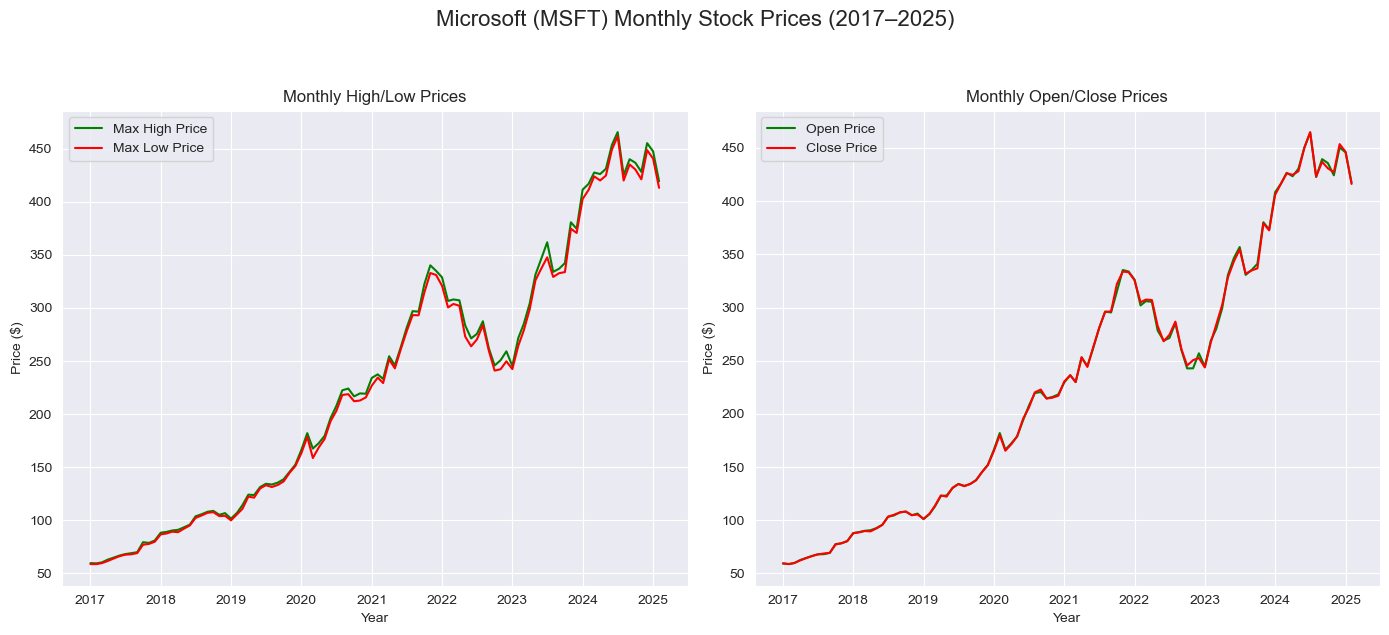

In [160]:
# Resample by month and get max values
month_resample = df.resample(rule="MS").max()



# Create subplots with titles and labels
plt.figure(figsize=(14, 6))
plt.suptitle("Microsoft (MSFT) Monthly Stock Prices (2017–2025)", fontsize=16, y=1.05)

# Subplot 1: High vs. Low Prices
plt.subplot(121)
plt.plot(month_resample["High"], c="g", label="Max High Price")
plt.plot(month_resample["Low"], c="r", label="Max Low Price")
plt.title("Monthly High/Low Prices")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.legend()

# Subplot 2: Open vs. Close Prices
plt.subplot(122)
plt.plot(month_resample["Open"], c="g", label="Open Price")
plt.plot(month_resample["Close"], c="r", label="Close Price")
plt.title("Monthly Open/Close Prices")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.legend()

plt.tight_layout()
plt.show()

In [169]:
# Highest Close Price
highest_close_date = month_resample["Close"].idxmax()
highest_close_value = month_resample["Close"].max()

# Lowest Close Price
lowest_close_date = month_resample["Close"].idxmin()
lowest_close_value = month_resample["Close"].min()
#
# print(f"Highest Close: ${highest_close_value:.2f} on {highest_close_date}")
# print(f"Lowest Close: ${lowest_close_value:.2f} on {lowest_close_date}")
type(highest_close_value)

pandas.core.series.Series

In [184]:
import cupy as cp

#
month_close = cp.max(month_resample["Close"])
# close_date = np.idxmax(month_resample["Close"])


month_open = cp.max(month_resample["Open"])
month_high = cp.max(month_resample["High"])
month_low = cp.max(month_resample["Low"])

month_close.item()

464.8543395996094

In [188]:
val = month_close.item()
month_resample[month_resample.Close == val]

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN
2017-02-01,NaN,NaN,NaN,NaN,NaN
2017-03-01,NaN,NaN,NaN,NaN,NaN
2017-04-01,NaN,NaN,NaN,NaN,NaN
2017-05-01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-10-01,NaN,NaN,NaN,NaN,NaN
2024-11-01,NaN,NaN,NaN,NaN,NaN


464.8543395996094

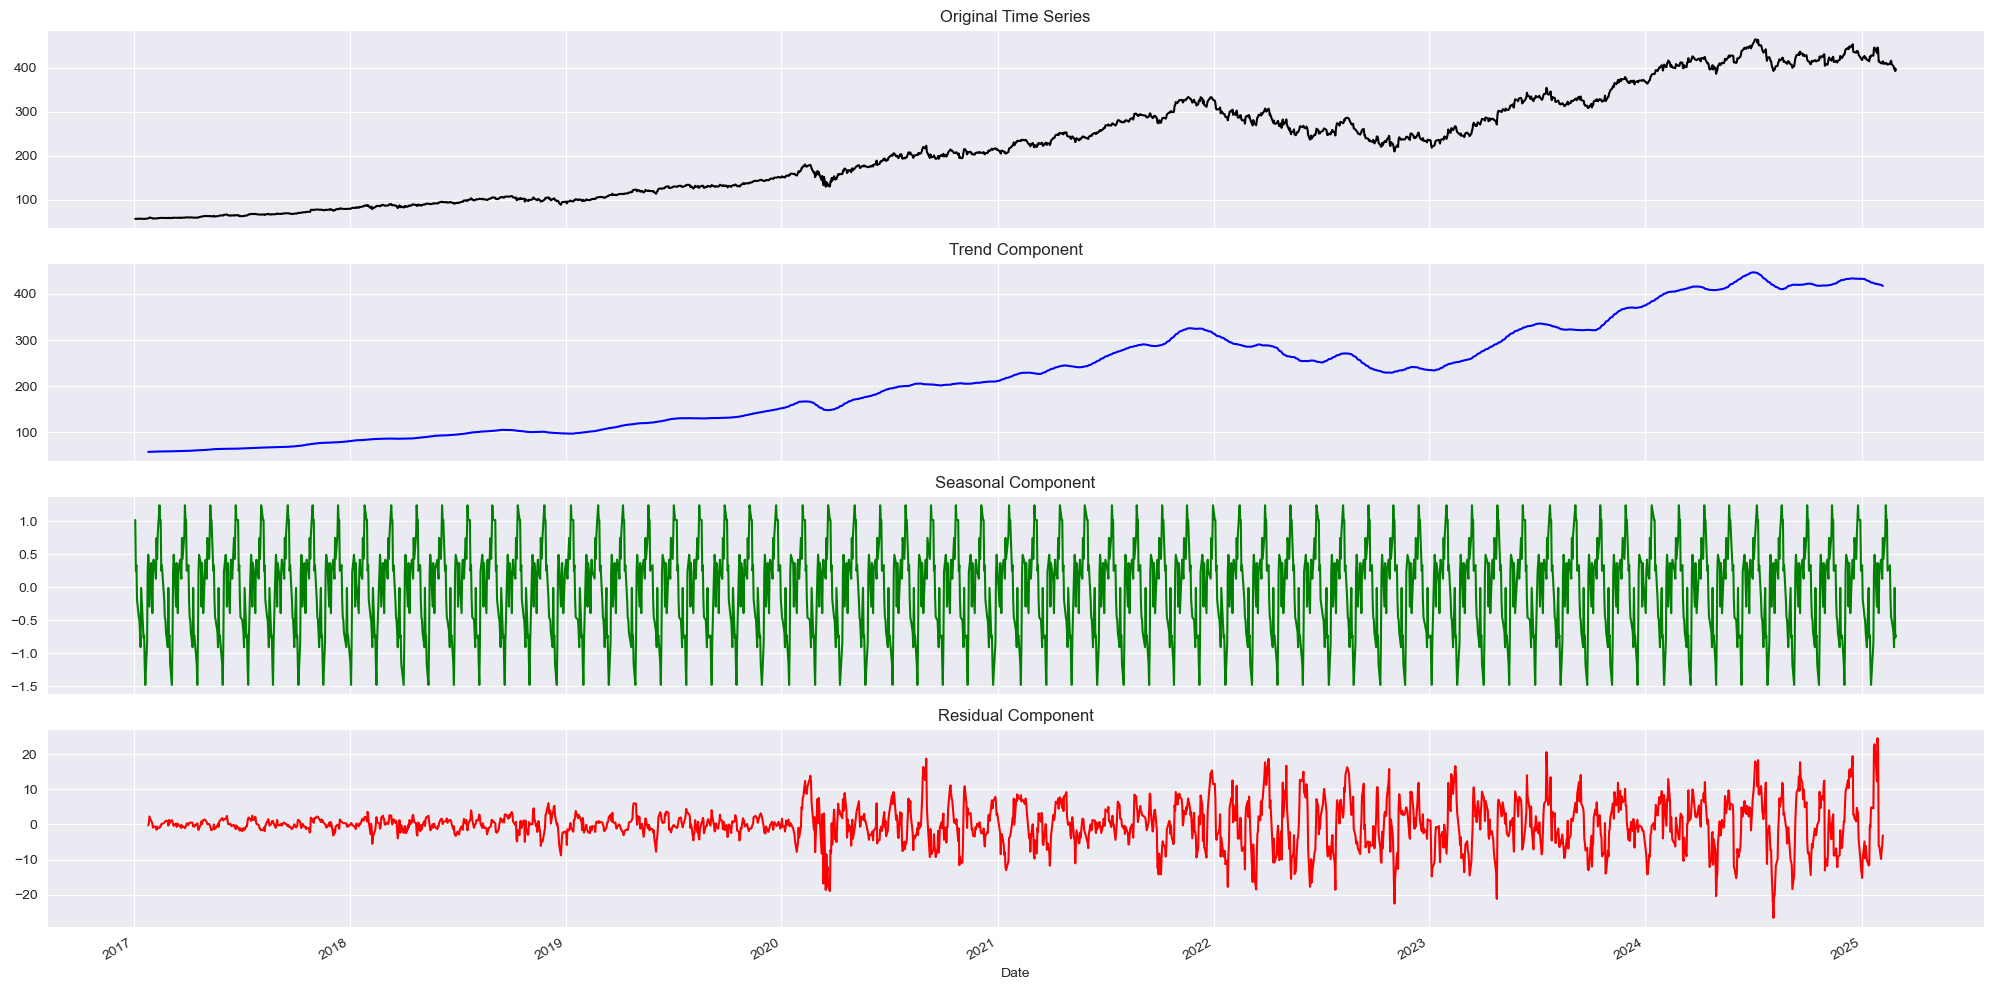

In [195]:
from statsmodels.tsa.seasonal import  seasonal_decompose
# Perform seasonal decomposition
decomposition = seasonal_decompose(df["Close"], model="additive", period=30)  # Adjust period as needed

# Plot the components
fig, axes = plt.subplots(4, 1, figsize=(20, 10), sharex=True)

decomposition.observed.plot(ax=axes[0], title="Original Time Series", color="black")
decomposition.trend.plot(ax=axes[1], title="Trend Component", color="blue")
decomposition.seasonal.plot(ax=axes[2], title="Seasonal Component", color="green")
decomposition.resid.plot(ax=axes[3], title="Residual Component", color="red")

plt.tight_layout()
plt.show()

In [196]:
df

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2017-01-03,56.601131,56.836290,56.194124,56.791067,20694100
2017-01-04,56.347878,56.754885,56.185074,56.510681,21340000
2017-01-05,56.347878,56.673484,56.103673,56.248386,24876000
2017-01-06,56.836296,57.116680,56.112728,56.347887,19922900
2017-01-09,56.655396,57.053360,56.564951,56.763930,20382700
...,...,...,...,...,...
2025-02-24,404.000000,409.369995,399.320007,408.510010,26443700
2025-02-25,397.899994,401.920013,396.700012,401.100006,29387400


In [204]:
X, y =[], []
step_size = 100
for i in range(0, len(df) + 1, step_size):
    idx_size = i + step_size
    if idx_size > len(df):
        idx_size = len(df) - (idx_size - step_size)

    seq_X, seq_y = df.iloc[i:idx_size], df.iloc[idx_size]
    X.append(seq_X)
    y.append(seq_y)

X, y

IndexError: single positional indexer is out-of-bounds

In [197]:
len(df)

2051

In [198]:
len(df)

2051